In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%cd ..
import sys
sys.path.append("/home/ahmet/deep-active-learning-2")

/home/ahmet/deep-active-learning-2


In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datasets import DatasetDict, Dataset

def convert_kpn_data():
    # read the csv
    df = pd.read_csv("kpn.csv", index_col=0)

    df = df.reset_index(drop=True)
    
    # drop the unnecessary columns 
    df = df.drop(columns=['segments', 'actor_id'])
    
    # remove the brackets from the dialogue acts
    df['dialogue_acts'] = df['dialogue_acts'].apply(lambda x: x.strip("[]"))
    
    # encode the labels
    le = LabelEncoder()
    df['label'] = le.fit_transform(df['dialogue_acts'])

    print(le.classes_)

    # sort the turns by turn order
    df = df.groupby("conversation_id", group_keys=True).apply(lambda x: x.sort_values(by=['order'])).reset_index(drop=True)

    # create the nested structure
    df = df.groupby("conversation_id").agg(list)

    display(df)
    
    # remove the conversations with more than 4000 tokens
    total_length = lambda text_list: sum([len(text) for text in text_list])
    df = df[df['text'].apply(total_length) / 4 < 4000]

    # split the data into train and test
    train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)
    print(train_data.shape, test_data.shape)

    # create the dataset dict
    train_dataset = Dataset.from_pandas(train_data)
    test_dataset = Dataset.from_pandas(test_data)
    dataset_dict = DatasetDict({"train": train_dataset, "test": test_dataset})

    os.makedirs("data/kpn", exist_ok=True)
    dataset_dict.save_to_disk("data/kpn")

# convert_kpn_data()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datasets import DatasetDict, Dataset
import os
from sklearn.model_selection import train_test_split

def convert_kpn_data_old():
    # read the csv
    df = pd.read_csv("kpn.csv")

    # drop unnecessary columns
    df = df.drop(columns=['turn_length', 'turn_order_relative', 'channel', 'Person', 'Label', 'probs', 'actor_num'])
    
    # filter out dialogues with weird dialogue ids
    df = df[df['Dialogue ID'].str.count('_') == 2]

    # encode the labels
    le = LabelEncoder()
    df['label'] = le.fit_transform(df['label_num'])

    print(le.classes_)

    # sort the turns by turn order
    df = df.groupby("Dialogue ID").apply(lambda x: x.sort_values(by=['turn_order'])).reset_index(drop=True)

    # create the nested structure
    df = df.groupby("Dialogue ID").agg(list)

    display(df)
    
    # split the data into train and test
    train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)
    print(train_data.shape, test_data.shape)

    # create the dataset dict
    train_dataset = Dataset.from_pandas(train_data)
    test_dataset = Dataset.from_pandas(test_data)
    dataset_dict = DatasetDict({"train": train_dataset, "test": test_dataset})

    os.makedirs("data/kpn", exist_ok=True)
    dataset_dict.save_to_disk("data/kpn")


# convert_kpn_data()
# 75763 correct split
# 81506 wrong split

Dataset loaded from disk


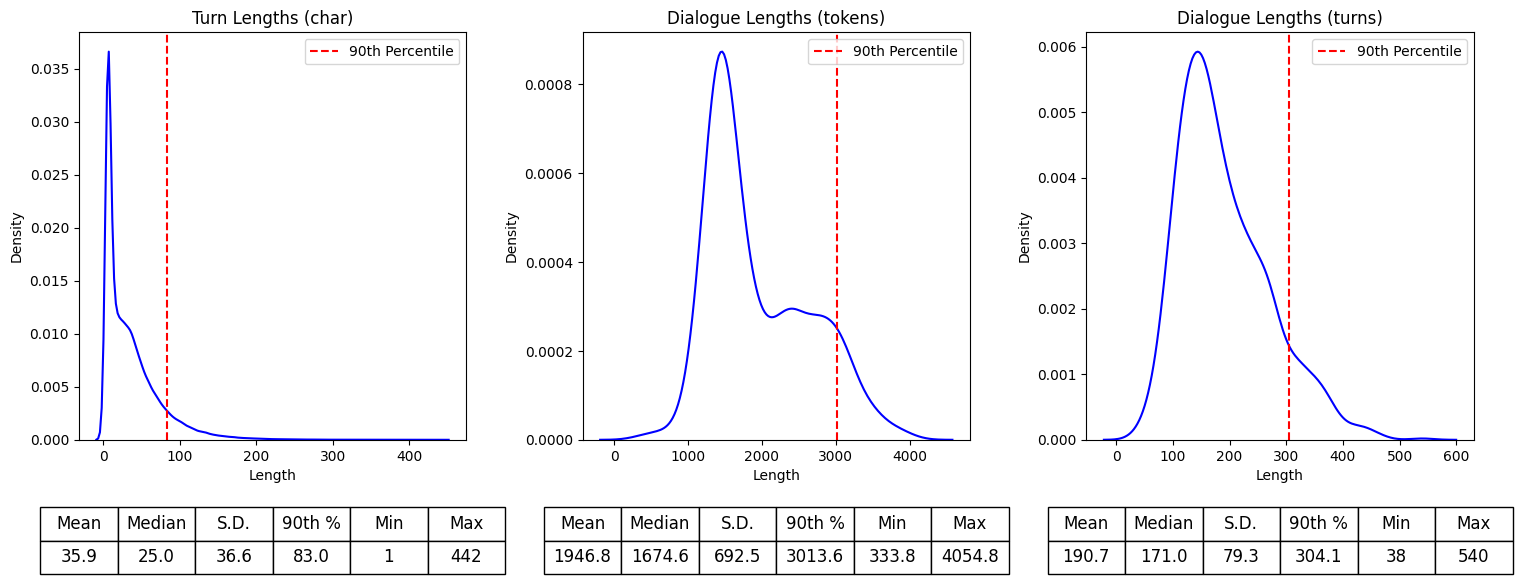

In [37]:
from data import get_DYDA, get_SWDA, get_KPN
from plot_distributions import display_dataset_statistics

train, test = get_SWDA()

display_dataset_statistics(train)

In [4]:
len(train[0]), len(test[0])

(11118, 1000)